# Wine Review

导入所需要的包

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns 

导入数据，给出数据摘要,并检查完整性

In [2]:
wine=pd.read_csv('./winemag-data_first150k.csv')
wine=wine.drop(labels='Unnamed: 0',axis=1)
wine.info()
print("缺失数据及个数：\n",wine.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB
缺失数据及个数：
 country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64


数据中包含两个数值属性points和price，其余均为标称属性

## 数据去重

In [3]:
wine.duplicated().value_counts()
wine=wine.drop_duplicates()
#清除重复的数据
dupilicated_index=list(wine[wine[['country','description','designation','province','points','price']].duplicated()].index)
wine=wine.drop(labels=dupilicated_index,axis=0)
wine.reset_index(drop=True)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


# 标称属性
输出标称属性的频数，词条太多在此处仅展示每个标称属性的前15项

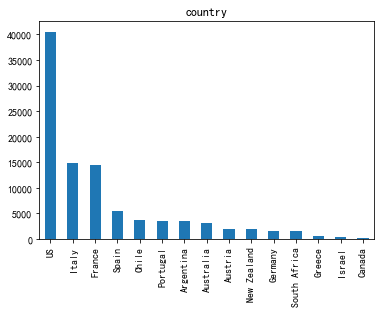

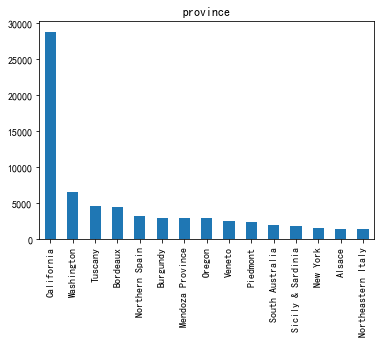

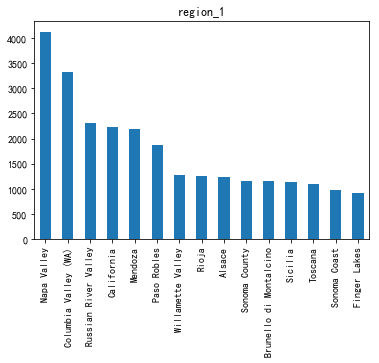

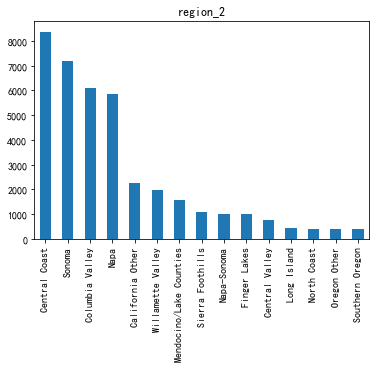

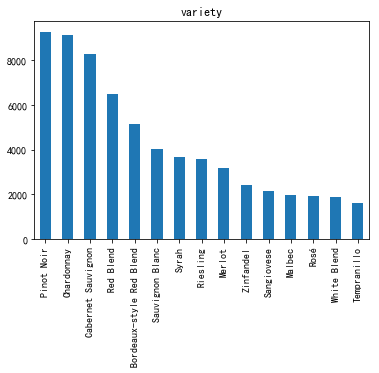

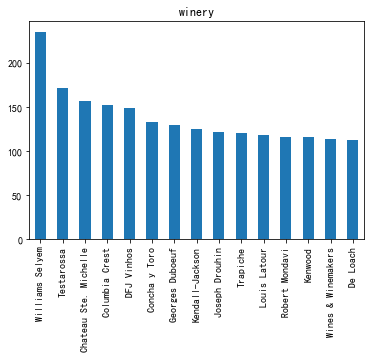

In [4]:
plt.figure()
wine['country'].value_counts()[0:15].plot.bar(title='country')
plt.figure()
wine['province'].value_counts()[0:15].plot.bar(title='province')
plt.figure()
wine['region_1'].value_counts()[0:15].plot.bar(title='region_1')
plt.figure()
wine['region_2'].value_counts()[0:15].plot.bar(title='region_2')
plt.figure()
wine['variety'].value_counts()[0:15].plot.bar(title='variety')
plt.figure()
wine['winery'].value_counts()[0:15].plot.bar(title='winery')

# 数值属性
## points情况（五数概括及可视化）

count    97843.000000
mean        87.956614
std          3.218012
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: points, dtype: float64

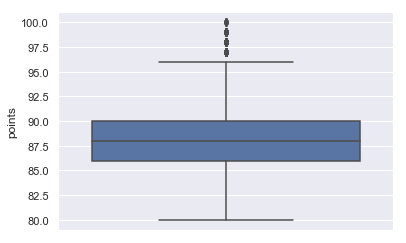

In [5]:
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine)
wine.points.describe()

## price情况（五数概括及可视化）

count    89127.000000
mean        33.659362
std         37.670893
min          4.000000
25%         16.000000
50%         25.000000
75%         40.000000
max       2300.000000
Name: price, dtype: float64


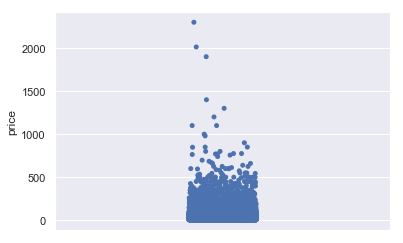

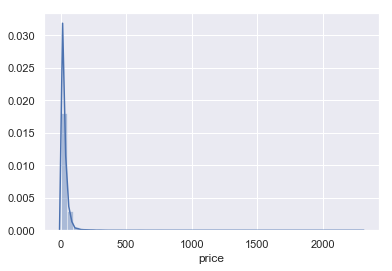

In [14]:
print(wine.price.describe())
plt.figure()
sns.stripplot(y='price',data=wine)
plt.figure()
sns.distplot(wine.price.dropna())

## price与points的关系

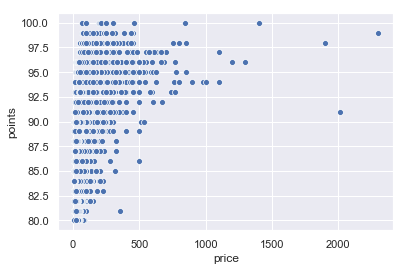

In [15]:
plt.figure()
sns.scatterplot(x='price',y='points',data=wine)

# 数据缺失的处理
## 1. 将缺失部分剔除

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25424 entries, 0 to 149635
Data columns (total 10 columns):
country        25424 non-null object
description    25424 non-null object
designation    25424 non-null object
points         25424 non-null int64
price          25424 non-null float64
province       25424 non-null object
region_1       25424 non-null object
region_2       25424 non-null object
variety        25424 non-null object
winery         25424 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


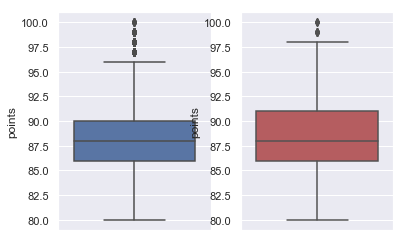

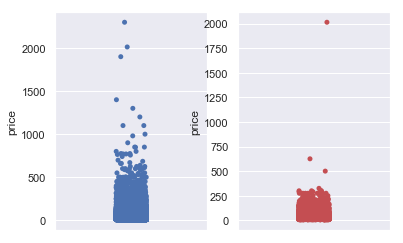

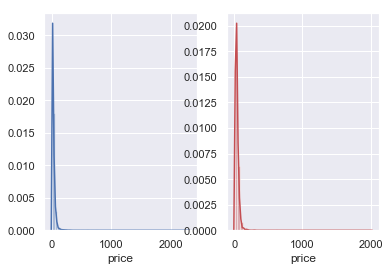

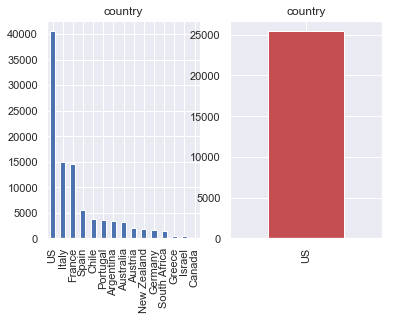

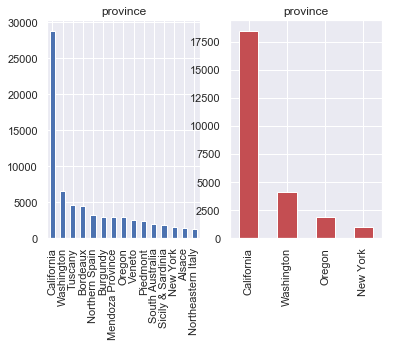

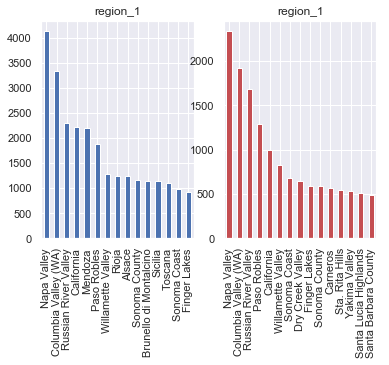

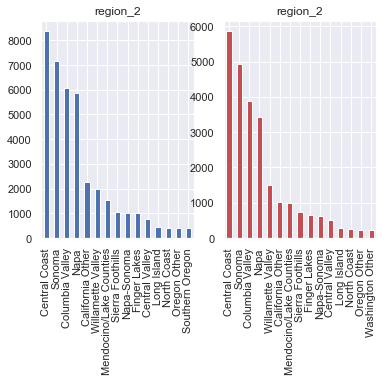

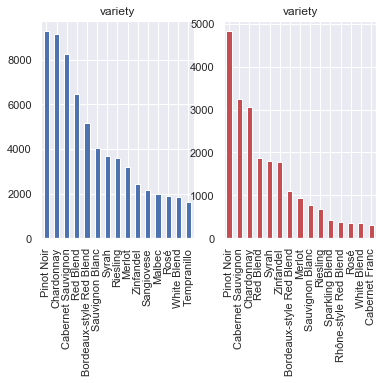

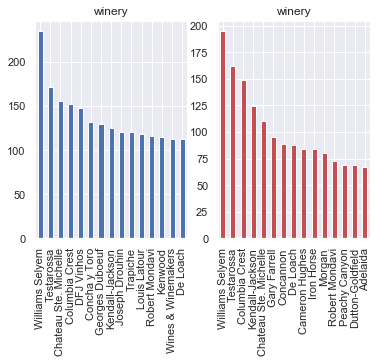

In [8]:
wine1=wine.copy(deep=True)
wine1=wine1.dropna() #删除包含空值的所有行
wine1.info()
#对比结果
plt.figure()
plt.subplot(121)
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine)
wine.points.describe()
plt.subplot(122)
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine1,color='r')
wine1.points.describe()

plt.figure()
wine.price.describe()
plt.subplot(121)
sns.stripplot(y='price',data=wine)
plt.subplot(122)
sns.stripplot(y='price',data=wine1,color='r')
plt.figure()
plt.subplot(121)
sns.distplot(wine.price.dropna())
plt.subplot(122)
sns.distplot(wine1.price.dropna(),color='r')

plt.figure()
plt.subplot(121)
wine['country'].value_counts()[0:15].plot.bar(title='country')
plt.subplot(122)
wine1['country'].value_counts()[0:15].plot.bar(title='country',color='r')
plt.figure()
plt.subplot(121)
wine['province'].value_counts()[0:15].plot.bar(title='province')
plt.subplot(122)
wine1['province'].value_counts()[0:15].plot.bar(title='province',color='r')
plt.figure()
plt.subplot(121)
wine['region_1'].value_counts()[0:15].plot.bar(title='region_1')
plt.subplot(122)
wine1['region_1'].value_counts()[0:15].plot.bar(title='region_1',color='r')
plt.figure()
plt.subplot(121)
wine['region_2'].value_counts()[0:15].plot.bar(title='region_2')
plt.subplot(122)
wine1['region_2'].value_counts()[0:15].plot.bar(title='region_2',color='r')
plt.figure()
plt.subplot(121)
wine['variety'].value_counts()[0:15].plot.bar(title='variety')
plt.subplot(122)
wine1['variety'].value_counts()[0:15].plot.bar(title='variety',color='r')
plt.figure()
plt.subplot(121)
wine['winery'].value_counts()[0:15].plot.bar(title='winery')
plt.subplot(122)
wine1['winery'].value_counts()[0:15].plot.bar(title='winery',color='r')

## 2. 用最高频率值来填补缺失值

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97843 entries, 0 to 149639
Data columns (total 10 columns):
country        97843 non-null object
description    97843 non-null object
designation    97843 non-null object
points         97843 non-null int64
price          97843 non-null float64
province       97843 non-null object
region_1       97843 non-null object
region_2       97843 non-null object
variety        97843 non-null object
winery         97843 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ MB


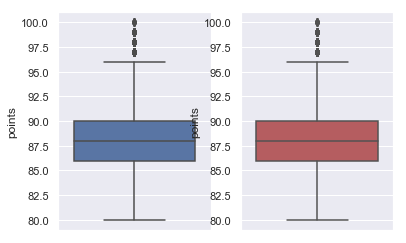

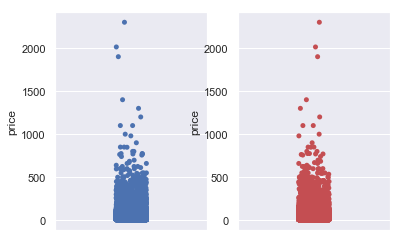

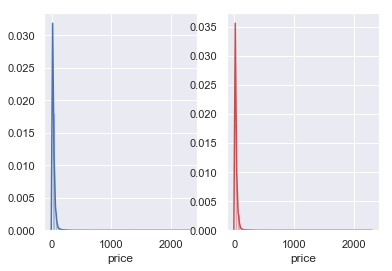

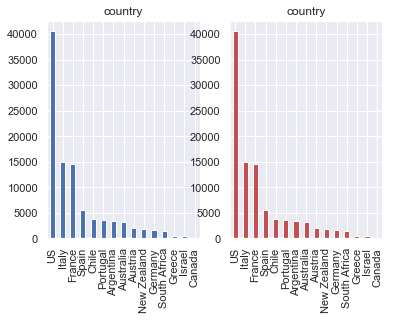

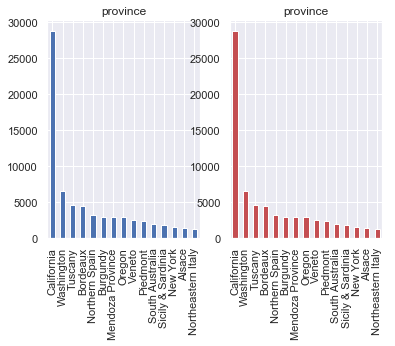

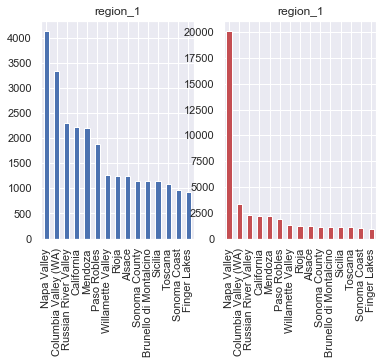

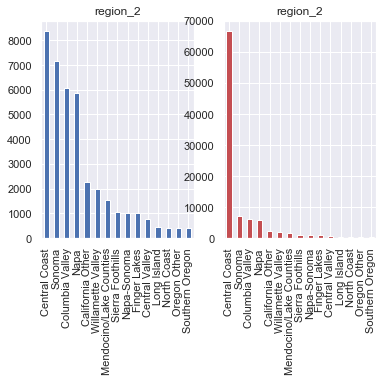

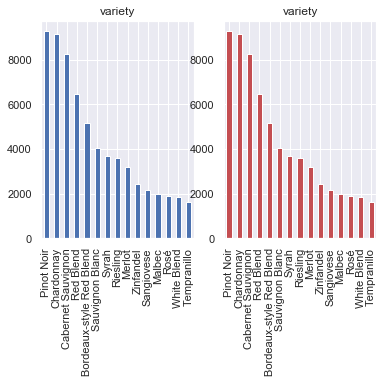

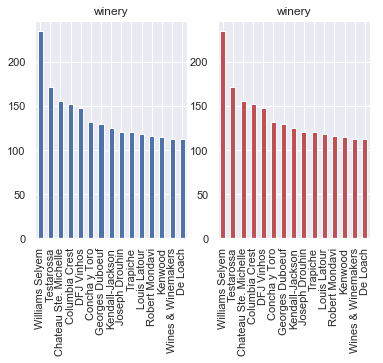

In [9]:
wine1=wine.copy(deep=True)
for i in wine1.columns:
    wine1[i]=wine1[i].fillna(wine1[i].mode()[0])
print(wine1.isnull().sum())
wine1.info()
#对比结果
plt.figure()
plt.subplot(121)
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine)
wine.points.describe()
plt.subplot(122)
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine1,color='r')
wine1.points.describe()

plt.figure()
wine.price.describe()
plt.subplot(121)
sns.stripplot(y='price',data=wine)
plt.subplot(122)
sns.stripplot(y='price',data=wine1,color='r')
plt.figure()
plt.subplot(121)
sns.distplot(wine.price.dropna())
plt.subplot(122)
sns.distplot(wine1.price.dropna(),color='r')

plt.figure()
plt.subplot(121)
wine['country'].value_counts()[0:15].plot.bar(title='country')
plt.subplot(122)
wine1['country'].value_counts()[0:15].plot.bar(title='country',color='r')
plt.figure()
plt.subplot(121)
wine['province'].value_counts()[0:15].plot.bar(title='province')
plt.subplot(122)
wine1['province'].value_counts()[0:15].plot.bar(title='province',color='r')
plt.figure()
plt.subplot(121)
wine['region_1'].value_counts()[0:15].plot.bar(title='region_1')
plt.subplot(122)
wine1['region_1'].value_counts()[0:15].plot.bar(title='region_1',color='r')
plt.figure()
plt.subplot(121)
wine['region_2'].value_counts()[0:15].plot.bar(title='region_2')
plt.subplot(122)
wine1['region_2'].value_counts()[0:15].plot.bar(title='region_2',color='r')
plt.figure()
plt.subplot(121)
wine['variety'].value_counts()[0:15].plot.bar(title='variety')
plt.subplot(122)
wine1['variety'].value_counts()[0:15].plot.bar(title='variety',color='r')
plt.figure()
plt.subplot(121)
wine['winery'].value_counts()[0:15].plot.bar(title='winery')
plt.subplot(122)
wine1['winery'].value_counts()[0:15].plot.bar(title='winery',color='r')

## 3. 通过属性的相关关系来填补缺失值

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25563 entries, 0 to 149635
Data columns (total 10 columns):
country        25563 non-null object
description    25563 non-null object
designation    25563 non-null object
points         25563 non-null int64
price          25563 non-null float64
province       25563 non-null object
region_1       25563 non-null object
region_2       25563 non-null object
variety        25563 non-null object
winery         25563 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


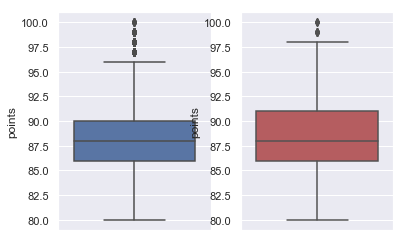

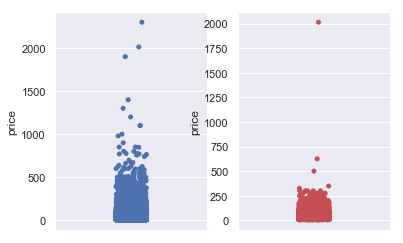

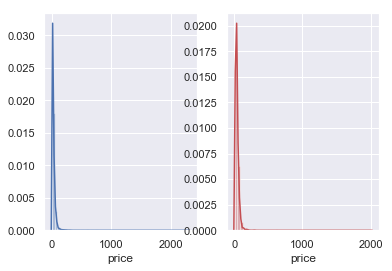

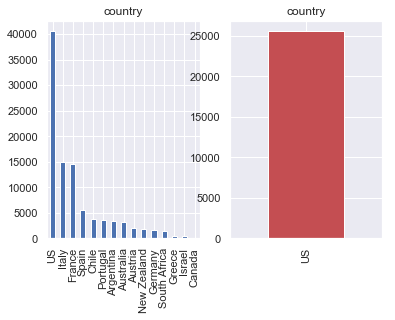

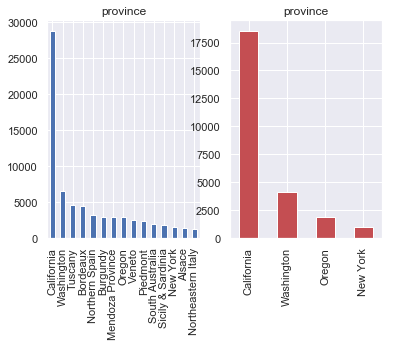

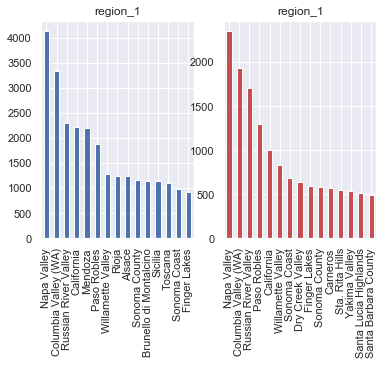

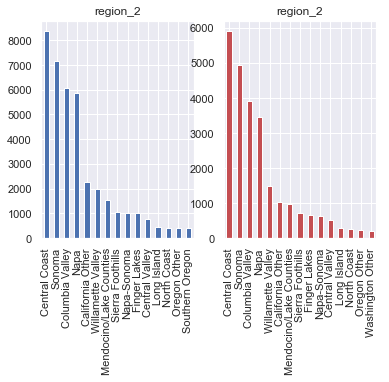

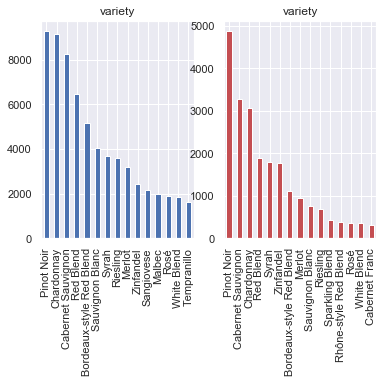

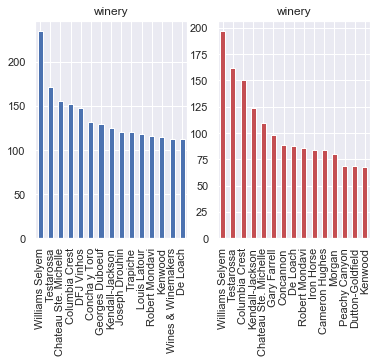

In [12]:
#通过拉格朗日插值法填充缺失值
wine1=wine.copy(deep=True)
for i in wine1.columns:
    wine1[i]=wine1[i].interpolate(method='linear')
#删除剩余值
wine1=wine1.dropna()

print(wine1.isnull().sum())
wine1.info()

#对比结果
plt.figure()
plt.subplot(121)
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine)
wine.points.describe()
plt.subplot(122)
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine1,color='r')
wine1.points.describe()

plt.figure()
wine.price.describe()
plt.subplot(121)
sns.stripplot(y='price',data=wine)
plt.subplot(122)
sns.stripplot(y='price',data=wine1,color='r')
plt.figure()
plt.subplot(121)
sns.distplot(wine.price.dropna())
plt.subplot(122)
sns.distplot(wine1.price.dropna(),color='r')

plt.figure()
plt.subplot(121)
wine['country'].value_counts()[0:15].plot.bar(title='country')
plt.subplot(122)
wine1['country'].value_counts()[0:15].plot.bar(title='country',color='r')
plt.figure()
plt.subplot(121)
wine['province'].value_counts()[0:15].plot.bar(title='province')
plt.subplot(122)
wine1['province'].value_counts()[0:15].plot.bar(title='province',color='r')
plt.figure()
plt.subplot(121)
wine['region_1'].value_counts()[0:15].plot.bar(title='region_1')
plt.subplot(122)
wine1['region_1'].value_counts()[0:15].plot.bar(title='region_1',color='r')
plt.figure()
plt.subplot(121)
wine['region_2'].value_counts()[0:15].plot.bar(title='region_2')
plt.subplot(122)
wine1['region_2'].value_counts()[0:15].plot.bar(title='region_2',color='r')
plt.figure()
plt.subplot(121)
wine['variety'].value_counts()[0:15].plot.bar(title='variety')
plt.subplot(122)
wine1['variety'].value_counts()[0:15].plot.bar(title='variety',color='r')
plt.figure()
plt.subplot(121)
wine['winery'].value_counts()[0:15].plot.bar(title='winery')
plt.subplot(122)
wine1['winery'].value_counts()[0:15].plot.bar(title='winery',color='r')

## 4. 通过数据对象之间的相似性来填补缺失值

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25563 entries, 0 to 149635
Data columns (total 10 columns):
country        25563 non-null object
description    25563 non-null object
designation    25563 non-null object
points         25563 non-null int64
price          25563 non-null float64
province       25563 non-null object
region_1       25563 non-null object
region_2       25563 non-null object
variety        25563 non-null object
winery         25563 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


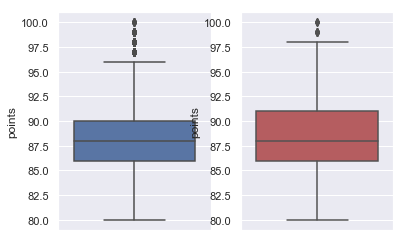

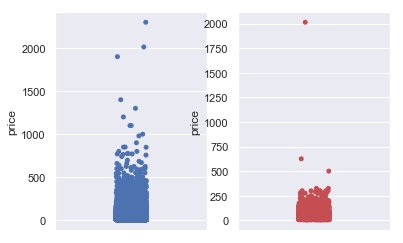

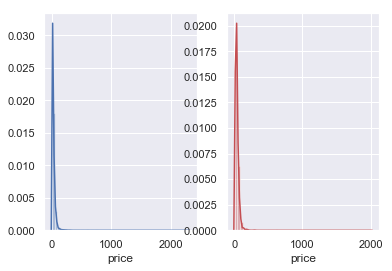

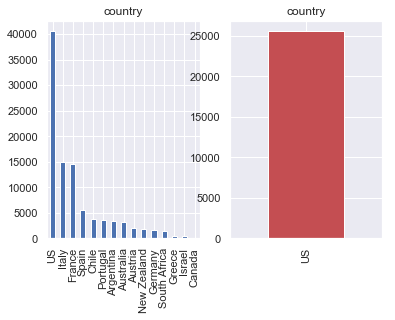

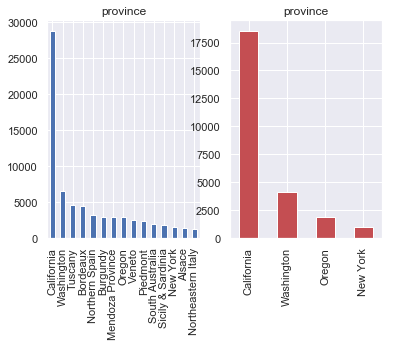

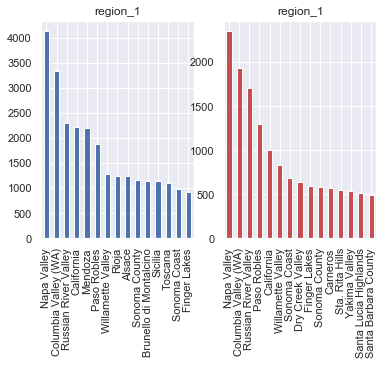

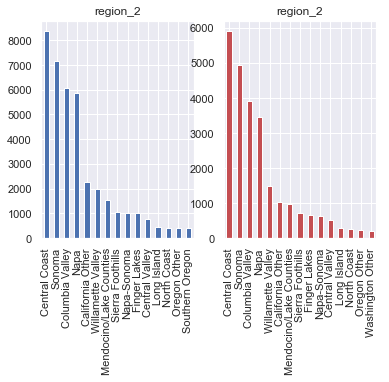

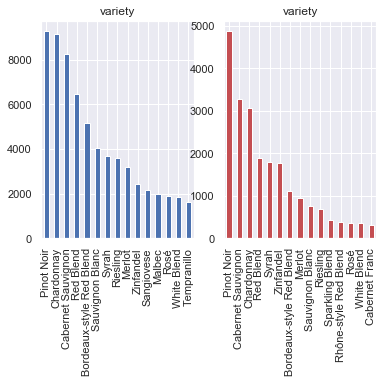

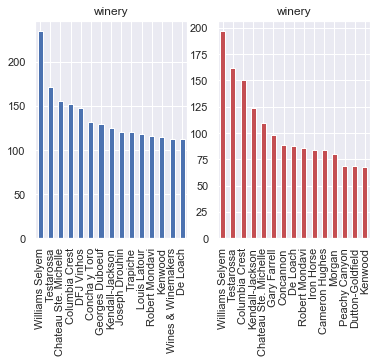

In [13]:
#使用最相似数据的填补
wine1=wine.copy(deep=True)
for i in wine1.columns:
    wine1[i]=wine1[i].interpolate(method='nearest')
#删除剩余值
wine1=wine1.dropna()
print(wine1.isnull().sum())
wine1.info()

#对比结果
plt.figure()
plt.subplot(121)
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine)
wine.points.describe()
plt.subplot(122)
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine1,color='r')
wine1.points.describe()

plt.figure()
wine.price.describe()
plt.subplot(121)
sns.stripplot(y='price',data=wine)
plt.subplot(122)
sns.stripplot(y='price',data=wine1,color='r')
plt.figure()
plt.subplot(121)
sns.distplot(wine.price.dropna())
plt.subplot(122)
sns.distplot(wine1.price.dropna(),color='r')

plt.figure()
plt.subplot(121)
wine['country'].value_counts()[0:15].plot.bar(title='country')
plt.subplot(122)
wine1['country'].value_counts()[0:15].plot.bar(title='country',color='r')
plt.figure()
plt.subplot(121)
wine['province'].value_counts()[0:15].plot.bar(title='province')
plt.subplot(122)
wine1['province'].value_counts()[0:15].plot.bar(title='province',color='r')
plt.figure()
plt.subplot(121)
wine['region_1'].value_counts()[0:15].plot.bar(title='region_1')
plt.subplot(122)
wine1['region_1'].value_counts()[0:15].plot.bar(title='region_1',color='r')
plt.figure()
plt.subplot(121)
wine['region_2'].value_counts()[0:15].plot.bar(title='region_2')
plt.subplot(122)
wine1['region_2'].value_counts()[0:15].plot.bar(title='region_2',color='r')
plt.figure()
plt.subplot(121)
wine['variety'].value_counts()[0:15].plot.bar(title='variety')
plt.subplot(122)
wine1['variety'].value_counts()[0:15].plot.bar(title='variety',color='r')
plt.figure()
plt.subplot(121)
wine['winery'].value_counts()[0:15].plot.bar(title='winery')
plt.subplot(122)
wine1['winery'].value_counts()[0:15].plot.bar(title='winery',color='r')